In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [124]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [125]:
df.shape

(374, 13)

In [126]:
df_processed = df.drop(columns=['Person ID']).copy()

In [127]:
bp_split = df_processed['Blood Pressure'].str.split('/', expand=True)
df_processed['Systolic BP'] = bp_split[0].astype(int)
df_processed['Diastolic BP'] = bp_split[1].astype(int)
df_processed = df_processed.drop(columns=['Blood Pressure'])

In [128]:
numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()

In [129]:
df_categorical = pd.get_dummies(df_processed[categorical_cols], drop_first=True)

In [130]:
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(
    scaler.fit_transform(df_processed[numerical_cols]), 
    columns=numerical_cols
)

In [137]:
df_final = pd.concat([df_numerical_scaled, df_categorical], axis=1)

Text(0.5, 1.02, 'Standardized Numerical Features')

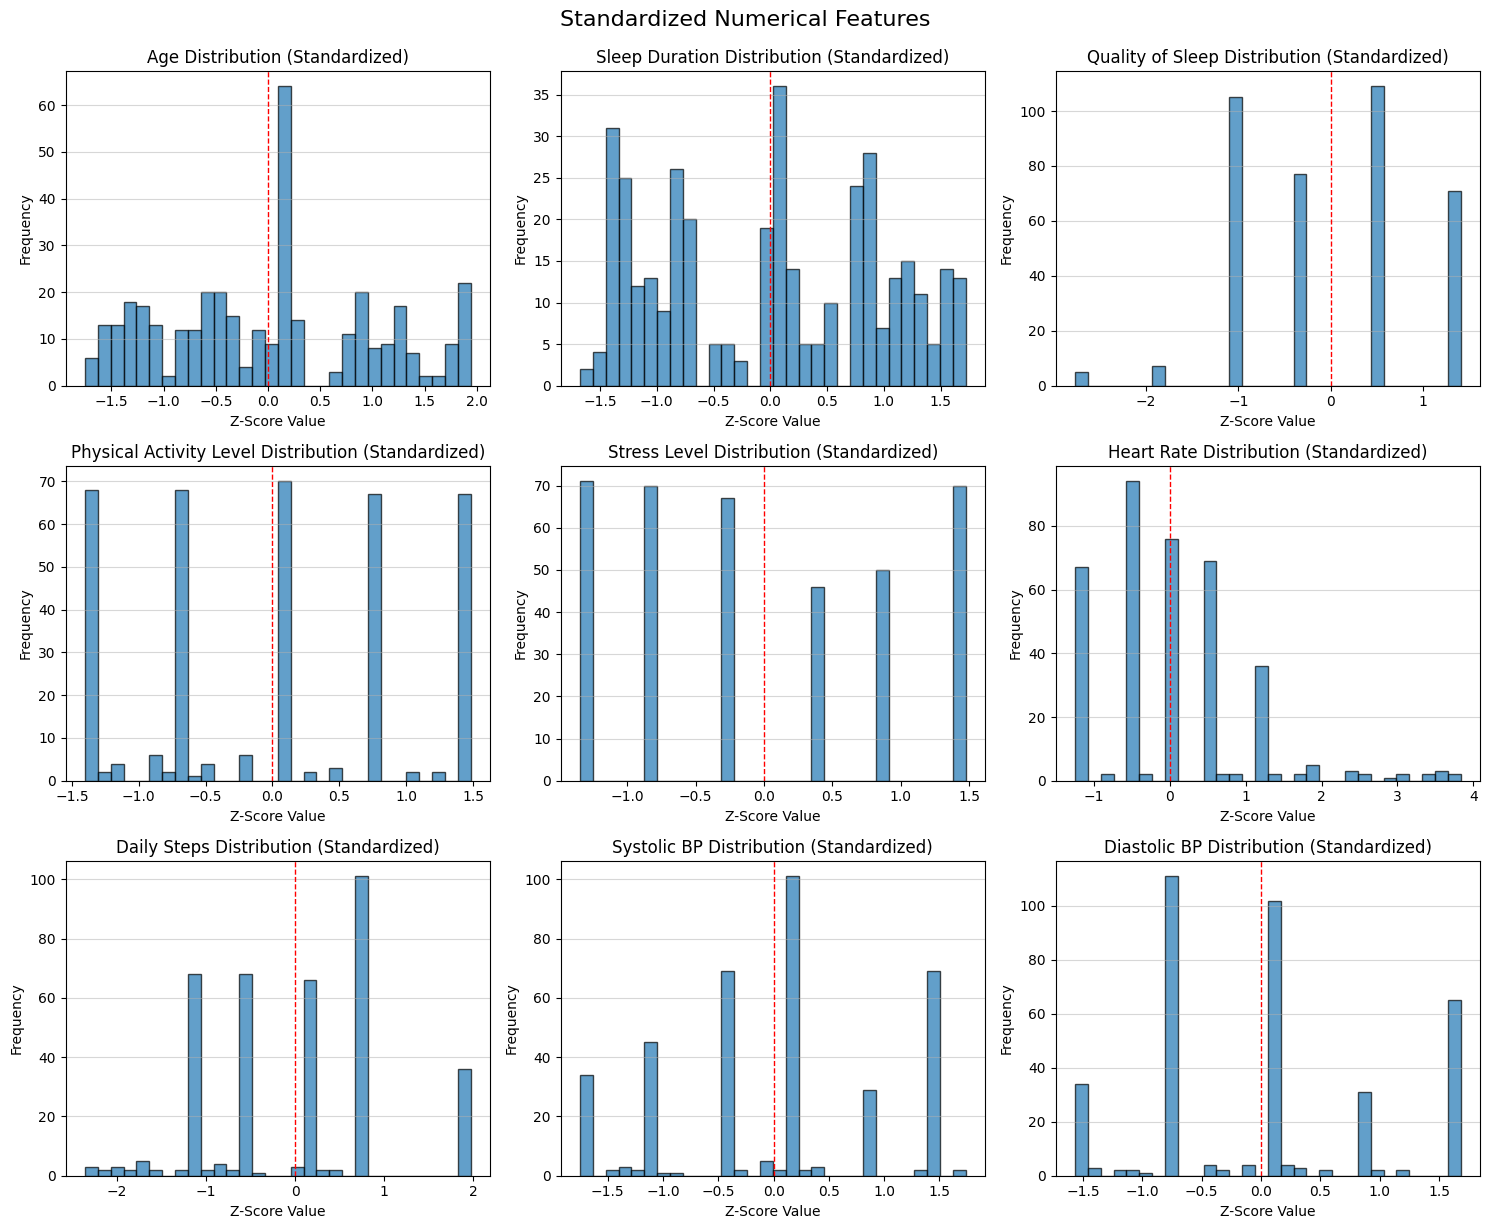

In [138]:
df_plot = df_numerical_scaled

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(df_plot[col], bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(df_plot[col].mean(), color='red', linestyle='dashed', linewidth=1)
    
    ax.set_title(f'{col} Distribution (Standardized)', fontsize=12)
    ax.set_xlabel('Z-Score Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', alpha=0.5)

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Standardized Numerical Features', fontsize=16, y=1.02)